# Chapter 1 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

1. Conditional probability: suppose that if θ = 1, then y has a normal distribution with mean 1 and standard deviation σ, and if θ = 2, then y has a normal distribution with mean 2 and standard deviation σ. Also, suppose Pr(θ = 1) = 0.5 and Pr(θ = 2) = 0.5.

a) For σ = 2, write the formula for the marginal probability density for y and sketch it.

b) What is Pr(θ = 1|y = 1), again supposing σ = 2?

c) Describe how the posterior density of θ changes in shape as σ is increased and as it is
decreased.

1.a. $$p(y|\theta=1) = N(1,\sigma^2)$$
$$p(y|\theta=2) = N(2,\sigma^2)$$
$$p(\theta=1)=0.5$$
$$p(\theta=2)=0.5$$
Recall the result of marginalization of $p(y,\theta)$ over $\theta$:
$$p(y) = \int p(y,\theta) d\theta = \int p(\theta)p(y|\theta)$$
$$p(y) = \sum_{i=1}^2 p(\theta=i)p(y|\theta=i)$$
$$p(y) = p(\theta=1)p(y|\theta=1) + p(\theta=2)p(y|\theta=2)$$
$$p(y) = 0.5 N(1,4) + 0.5 N(2,4)$$

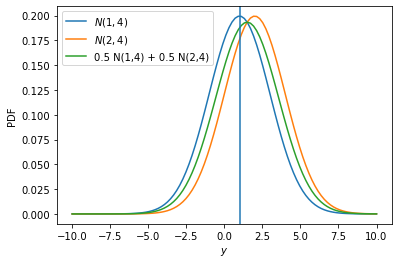

In [2]:
x = np.linspace(-10,10,100)
y1 = 0.5*stats.norm.pdf(x,loc=1,scale=2)
y2 = 0.5*stats.norm.pdf(x,loc=2,scale=2)
plt.figure()
plt.plot(x,2*y1,label=r'$N(1,4)$')
plt.plot(x,2*y2,label=r'$N(2,4)$')
plt.plot(x,y1+y2,label='0.5 N(1,4) + 0.5 N(2,4)')
plt.axvline(1)
plt.legend()
plt.xlabel(r'$y$')
plt.ylabel(r'PDF')
plt.show()

1.b. Pr(θ = 1|y = 1), again supposing σ = 2?

We recognize the application of Bayes' theorem.

$$Pr(\theta=1|y=1) = \frac{p(\theta=1)p(y=1|\theta=1)}{p(y)}$$
$$Pr(\theta=1|y=1) = \frac{0.5*N(1|\mu=1,\sigma=2)}{0.5 N(1|1,4) + 0.5 N(1|2,4)}$$

In [3]:
pr = 0.5*stats.norm.pdf(1,loc=1,scale=2)/(0.5*stats.norm.pdf(1,loc=1,scale=2)+0.5*stats.norm.pdf(1,loc=2,scale=2))
print(f'Pr(theta=1|y=1)={pr}')

Pr(theta=1|y=1)=0.5312093733737563


This matches the expectation from the plot above that at y=1, it is slightly more likely for $\theta=1$ if $y=1$.

1. c. Describe how the posterior density of θ changes in shape as σ is increased and as it is decreased.

As $\sigma$ is increased, the posterior will not demonstrate much constraint, while as $\sigma$ is decreased, the posterior density will demonstrate more constraint. Two such examples are provided below.

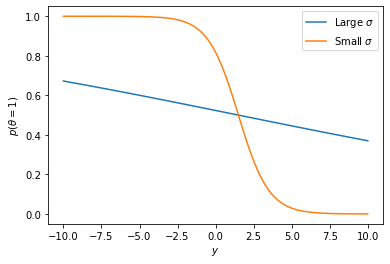

In [4]:
x = np.linspace(-10,10,100)
ptheta_broad = 0.5*stats.norm.pdf(x,loc=1,scale=4)/(0.5*stats.norm.pdf(x,loc=1,scale=4)+0.5*stats.norm.pdf(x,loc=2,scale=4))
ptheta_narrow = 0.5*stats.norm.pdf(x,loc=1,scale=1)/(0.5*stats.norm.pdf(x,loc=1,scale=1)+0.5*stats.norm.pdf(x,loc=2,scale=1))
plt.figure(1)
plt.plot(x,ptheta_broad,label=r'Large $\sigma$')
plt.plot(x,ptheta_narrow,label=r'Small $\sigma$')
plt.ylabel(r'$p(\theta=1)$')
plt.xlabel(r'$y$')
plt.legend()
plt.show()


3.Suppose that in each individual
of a large population there is a pair of genes, each of which can be either x or X, that
controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or
xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$
and of heterozygotes is 2p(1 − p), where 0 < p < 1. Each parent transmits one of its
own genes to the child; if a parent is a heterozygote, the probability that it transmits the
gene of type X is 0.5. Assuming random mating, show that among brown-eyed children
of brown-eyed parents, the expected proportion of heterozygotes is 2p/(1 + 2p). Suppose
Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have
n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote
and the probability that her first grandchild has blue eyes.

Begin by collecting the information. 

- $p(xx) = p^2$
- $p(xX)+p(Xx) = 2p(1-p)$
- $0<p<1$
- Heterozygote parents are equally likely to share gene x and X.

a. Show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is 2p/(1 + 2p)

What we want therefore is $p(xX)+p(Xx)$, under interchangeability this is just $2p(xX)$. Thus, we only have to show $p(xX)=p/(1+2p)$.

Let's look at the probabilities of parent configurations in this population.
$$P(\text{2 blue eyed parents})=p^4$$
$$P(\text{2 XX parents})=(1-p)^4$$
$$P(\text{1 XX parent, 1 xx parent})=4 p^2(1-p)^2$$

$$P(heterozygote|\text{brown eyed parents}) = \frac{P(\text{brown eyed parents}|heterozygote)*P(heterozygote)}{P(\text{brown eyed parents})}$$
$$= \frac{0*p^4+0*(1-p)^4+0.5*4p(1-p)^3+0.5*4p^2(1-p)^2}{(1-p)^4+4p^2(1-p)^2+(3/4)*4p(1-p^3)}$$
$$= \frac{2p(1-p)^3+2p^2(1-p)^2}{(1-p)^4+4p^2(1-p)^2+(3/4)*4p(1-p)^3}$$
$$= \frac{2p(1-p)+2p^2}{(1-p)^2+4p^2+(3/4)4p(1-p)}$$
$$= \frac{2p-2p^2+2p^2}{1-2p+p^2+4p^2+4p-3p^2}$$
$$= \frac{2p}{1+2p}$$
where the (3/4) arises since there is a 3/4 probability that Judy is brown-eyed if her parents are both heterozygotes.

b. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have
n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote
and the probability that her first grandchild has blue eyes.

Our prior is the information we have above, so the prior probability she herself is a heterozygote is $2p/(1+2p)$. The likelihood that $n$ children have brown eyes given that her partner is a heterozygote is $(3/4)^n$. Thus,

$$P(\text{Judy is a heterozygote}|\text{n children have brown eyes and partner is heterozygote})=\frac{P(\text{n children have brown eyes and partner is heterozygote}|\text{Judy is a heterozygote})P(\text{Judy is a heterozygote})}{P(\text{above, Judy is heterozygote})+P(\text{above, she is not})}$$
$$=\frac{\frac{2p}{1+2p}(3/4)^n}{\frac{2p}{1+2p}(3/4)^n + \frac{1}{1+2p}}$$

At this point, this is starting to become cumbersome to write clearly in markdown and I omit the rest, although the logic follows smoothly. One needs to find the probability Judy's child is Xx and she is Xx, the probability she is XX and her child is Xx, and then propagate this down to a grandchild being xx. 

4. Probability assignment: we will use the football dataset to estimate some conditional
probabilities about professional football games. There were twelve games with point
spreads of 8 points; the outcomes in those games were: −7, −5, −3, −3, 1, 6, 7, 13, 15,
16, 20, and 21, with positive values indicating wins by the favorite and negative values
indicating wins by the underdog. Consider the following conditional probabilities:

Pr(favorite wins | point spread = 8),

Pr(favorite wins by at least 8 | point spread = 8),

Pr(favorite wins by at least 8 | point spread = 8 and favorite wins).

a. Estimate each of these using the relative frequency of games with a point spread of 8.

Pr(favorite wins | point spread = 8) = 8/12

Pr(favorite wins by at least 8 | point spread = 8) = 5/12

Pr(favorite wins by at least 8 | point spread = 8 and favorite wins = 5/8

b. Estimate each using the normal approximation for the distribution of outcome −
point spread, $d \sim N(0,13.86^2)$.

In [5]:
print(f'Pr(favorite wins | point spread = 8) = {stats.norm.cdf(8.5,loc=0,scale=13.86)}')
# 8.5 is because 8 exactly would be a tie and scores are integers

print(f'Pr(favorite wins by at least 8 | point spread = 8) = {stats.norm.cdf(0.5,loc=0,scale=13.86)}')
# again 0.5, not 0, because 0 is a tie.

print(f'Pr(favorite wins by at least 8 | point spread = 8 and favorite wins = {stats.norm.cdf(0.5,loc=0,scale=13.86)/stats.norm.cdf(8.5,loc=0,scale=13.86)}')
# find the wins by at least 8 in a reduced population of only wins.

Pr(favorite wins | point spread = 8) = 0.7301529422912403
Pr(favorite wins by at least 8 | point spread = 8) = 0.5143887361530655
Pr(favorite wins by at least 8 | point spread = 8 and favorite wins = 0.7044945056838356


Many of these problems continue to deal with similar problems. Since I'm doing this myself as an exercise and not part of a course, I won't solve everything here. We skip to a simulation problem, 9.

9. Simulation of a queuing problem: a clinic has three doctors. Patients come into the clinic at random, starting at 9 a.m., according to a Poisson process with time parameter 10 minutes: that is, the time after opening at which the first patient appears follows an exponential distribution with expectation 10 minutes and then, after each patient arrives, the waiting time until the next patient is independently exponentially distributed, also with expectation 10 minutes. When a patient arrives, he or she waits until a doctor is available. The amount of time spent by each doctor with each patient is a random variable, uniformly distributed between 5 and 20 minutes. The office stops admitting new patients at 4 p.m. and closes when the last patient is through with the doctor.

a . Simulate this process once. How many patients came to the office? How many had to
wait for a doctor? What was their average wait? When did the office close?

In [6]:
# Initialize classes

class Patient:
    """
    Keeps track of patient information
    """
    
    def __init__(self,time=0):
        self.arrivaltime = float(stats.poisson.rvs(mu=10,size=1))+time
        self.visitlength = float(stats.uniform.rvs(loc=5,scale=15,size=1))

class Queue:
    """
    Keeps track of the office queue
    """
    
    def __init__(self):
        self.time = 0
        self.length = 0
        self.visittimesq = []
        
    def advance(self,step):
        self.time += step
        
    def add(self,n):
        self.length += n
        
    def subtract(self,n):
        self.length -= n
        
    def addtovisittimeq(self,val):
        self.visittimesq.append(val)
        
class Doctor:
    """
    Gives doctor's status and how much time left in a given visit
    """
    
    def __init__(self):
        self.free = True
        self.visitremaining = 0
        
    def see_patient(self):
        self.free = False
        
    def appt_done(self):
        self.free = True
    
    def visit_timer(self,n):
        self.visitremaining -= n
        
class wait:
    """
    Collects wait time information
    """
    
    def __init__(self):
        self.waittime = 0
        
    def wait(self,n):
        self.waittime += n
        
# Initialize objects

queue = Queue()
doc = Doctor()
wt = wait()

# Perform draws to find arrival intervals and visit lengths

shift=0
patients = []
officeopen = (16-9)*60 # getting time in minutes

while shift < officeopen:
    if shift==0:
        p=Patient()
        patients.append(p)
        shift = p.arrivaltime
    else:
        p=Patient()
        patients.append(p)
        shift+=p.arrivaltime

arrivals = [p.arrivaltime for p in patients]
visitlengths = [p.visitlength for p in patients]

# Get arrival times relative to when the office opened

arrivaltimes = np.array([sum(arrivals[:i]) for i in range(len(arrivals))]) # arrival times in minutes

# Have patients see the doctor

while (queue.time < officeopen or queue.length != 0): # keep going while the office is open or the queue isn't empty
    
    # at each time iteration, check if anyone has arrived
    # print(f'Time: {queue.time}')
    # print(f'Doctor free? {doc.free}')
    # print(f'Queue length: {queue.length}')
    check_for_patients = sum(arrivaltimes==queue.time)
    
    if check_for_patients: # taking advantage of Boolean True = 1
        queue.add(check_for_patients) # taking advantage of Boolean True = 1 again
        queue.addtovisittimeq(np.array(visitlengths)[arrivaltimes==queue.time]) # add the visit length to another queue
        # print(f'Adding a patient to the queue')
    
    # Check if doctor can see patient
    
    if queue.length != 0 and doc.free:
        # doctor is free, someone in queue
        doc.see_patient()
        doc.visitremaining = queue.visittimesq.pop(0) # get patient who has been waiting longest
        # print(f'New patient visit length: {doc.visitremaining}')
        queue.subtract(1) # removes patient from queue
        queue.advance(1)
        
    elif queue.length != 0 and not doc.free:
        # doctor isn't free, queue is not empty
        # print(f'New queue member visit length: {np.array(visitlengths)[arrivaltimes==queue.time]}')
        wt.wait(queue.length) # for each patient in queue, waits 1 timestep
        doc.visit_timer(1.)
        # print(f'Time left in visit: {doc.visitremaining}')
        
        if doc.visitremaining<0: # visit time expired
            doc.free = True
        queue.advance(1)
        
    elif queue.length == 0 and doc.free:
        queue.advance(1) #doctor not seeing anyone, nobody in queue
        
    elif queue.length == 0 and not doc.free:
        doc.visit_timer(1.)
        # print(f'Time left in visit: {doc.visitremaining}')
        if doc.visitremaining<0: # visit time expired
            doc.free = True
        queue.advance(1) # doctor seeing someone, nobody in queue

# Output simulation results        

print(f'Office empty.\nClosing Time: {int(9+queue.time/60)}h {round(queue.time % 60,0)} minutes')
print(f'Total time waited: {wt.waittime} minutes')
print(f'Mean wait time: {round(wt.waittime/len(arrivals),0)} minutes')
print(f'Total patients seen: {len(arrivals)}')

Office empty.
Closing Time: 18h 20 minutes
Total time waited: 2978 minutes
Mean wait time: 73.0 minutes
Total patients seen: 41


Conclusion: This doctor has to hire help so as to reduce wait times without compromising quality of care.